In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ols
import numpy as np
import matplotlib.pyplot as plt

In [9]:
n = 1000
p = 100
seed = 123

np.random.seed(seed)
X = np.random.normal(size=(n,p))
beta = np.random.uniform(-1, 1, p) * np.random.binomial(1, 0.2, p)
y = X @ beta + np.random.normal(size=n)

In [4]:
Q, R = np.linalg.qr(X, 'reduced')
beta_hat = np.linalg.solve(R, Q.T @ y)

In [10]:
ols_pbcd_out = ols.ols_pbcd(X, y, tol=1e-10)
ols_pbcd_out[2:]

(Array(9.555379e-11, dtype=float32), Array(860, dtype=int32, weak_type=True))

In [21]:
ols_epbcd_out = ols.ols_epbcd(X, y, n_batches=16, tol=1e-10, max_iters=11)
ols_epbcd_out[2:]

(25.379120090355478, 11)

In [12]:
ols_bcd_out = ols.ols_bcd(X, y, tol=1e-10)
ols_bcd_out[2:]

(6.739964448900396e-11, 11)

In [18]:
np.linalg.norm(y-X@ols_bcd_out[0]), np.linalg.norm(y-X@ols_pbcd_out[0]), np.linalg.norm(y-X@ols_epbcd_out[0])

(29.337062029958496, 29.337065, 29.337062029958773)

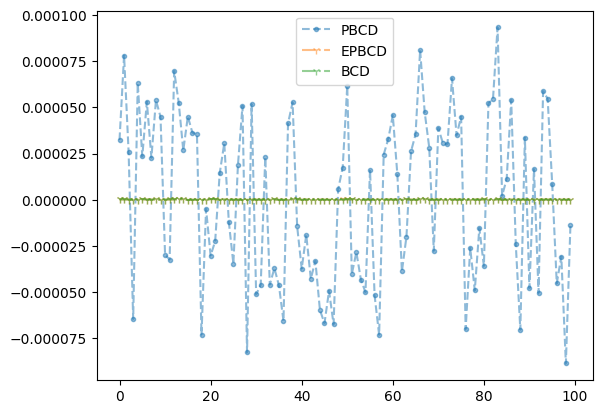

In [19]:
plt.plot(ols_pbcd_out[0]-beta_hat, label='PBCD', linestyle='--',  marker='.', alpha=0.5)
plt.plot(ols_epbcd_out[0]-beta_hat, label='EPBCD', linestyle='-.', marker='1', alpha=0.5)
plt.plot(ols_bcd_out[0]-beta_hat, label='BCD', linestyle='-.',  marker='1', alpha=0.5)
#plt.plot(beta_hat, label='Truth', linestyle='-', color='red', marker='v', alpha=0.5)
plt.legend()
plt.show()